# Movie Recommendation For Microsoft's New Studio

This project explores movie data to identify trends in box office performance and provide actionable recommendations for Microsoft's new movie studio.

### Overview

Microsoft is venturing into movie production and seeks insights into successful film types. This analysis utilizes exploratory data analysis techniques to uncover patterns that can inform their content creation strategy.

### Business Problem

Microsoft has decided to venture into the film industry by creating a new movie studio.  However, they lack prior experience in movie production. This project aims to leverage data analysis to provide valuable insights that can inform their content creation strategy.

### Data Understanding

Here we will:
>> * import the necessary libraries
>> * Read the data files using pandas into a dataframe
>> * Check what the datasets are made of, and check on various information which is going to answer the Five key Questions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bom= pd.read_csv('./data/bom.movie_gross.csv')
tmdb=  pd.read_csv('./data/tmdb.movies.csv', index_col=0)
tn= pd.read_csv('./data/tn.movie_budgets.csv')

In [3]:
bom.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


we have information about domestic and foreign gross telling us about the sell of the different movies here we can check the most sold movies with relation with year

In [4]:
tmdb.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,11/19/2010,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,3/26/2010,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,5/7/2010,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,11/22/1995,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,7/16/2010,Inception,8.3,22186


we have genre-ids ,and the popularity of some type of movie,we  can merge with the bom df on title part.

In [5]:
tn.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


in this dataframe we can check the production budget of various movies with domestic gross and foreign gross

### Data Preparation

Will first check if theres null values then i'll merge the three files yields to a single dataset for feature engineering and analysis. 

In [6]:
bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [7]:
null_percentages = bom.isnull().mean() * 100  # Multiply by 100 for percentage
null_percentages

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [8]:
bom.dropna(subset=['studio'], inplace=True) # Drops rows with missing values in 'studio'
bom.isnull().sum()

title                0
studio               0
domestic_gross      26
foreign_gross     1349
year                 0
dtype: int64

In [9]:
most_frequent_gross = bom['domestic_gross'].mode()[0] # Find the mode value
bom['domestic_gross'].fillna(most_frequent_gross, inplace=True)  # Replace missing values with the mode
bom.isnull().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

In [10]:
bom['foreign_gross'] = pd.to_numeric(bom['foreign_gross'], errors='coerce')
bom['foreign_gross'].info

<bound method Series.info of 0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3382, dtype: float64>

In [11]:
most_frequent_gross = bom['foreign_gross'].mode()[0] # Find the mode value
bom['foreign_gross'].fillna(most_frequent_gross, inplace=True)  # Replace missing values with the mode
bom.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [12]:
tmdb.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

its seems our data here is clean we can the merge it with bom dataframe

In [13]:
merged_df = pd.merge(bom, tmdb, on='title', how='inner')
merged_df

,title,studio,domestic_gross,foreign_gross,year,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000.0,2010,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,6/17/2010,7.7,8340
1,Inception,WB,292600000.0,535700000.0,2010,"[28, 878, 12]",27205,en,Inception,27.920,7/16/2010,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,5/16/2010,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,6/23/2010,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,"[12, 28, 878]",10138,en,Iron Man 2,28.515,5/7/2010,6.8,12368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,The Escape,IFC,14000.0,1200000.0,2018,"[53, 28]",459814,en,The Escape,0.600,8/14/2015,7.0,1
2699,The Escape,IFC,14000.0,1200000.0,2018,"[53, 28]",417004,en,The Escape,1.176,10/23/2016,6.6,10
2700,Souvenir,Strand,11400.0,1200000.0,2018,"[35, 18]",408258,fr,Souvenir,2.130,9/8/2016,5.8,14
2701,The Quake,Magn.,6200.0,1200000.0,2018,[12],416194,no,Skjelvet,11.051,12/14/2018,6.7,81


In [14]:
tn.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

lets first remove the dollar signs so we can merge it with the merged_df

In [15]:
tn['production_budget'].info

<bound method Series.info of 0       $425,000,000 
1       $410,600,000 
2       $350,000,000 
3       $330,600,000 
4       $317,000,000 
            ...      
5777          $7,000 
5778          $6,000 
5779          $5,000 
5780          $1,400 
5781          $1,100 
Name: production_budget, Length: 5782, dtype: object>

In [16]:
# Remove dollar sign and commas, convert to numeric (float for decimals)
tn['production_budget'] = pd.to_numeric(tn['production_budget'].str.replace('[$,]', '', regex=True), errors='coerce')


In [17]:
tn['production_budget'].info

<bound method Series.info of 0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget, Length: 5782, dtype: int64>

In [18]:
# Remove dollar sign and commas, convert to numeric (float for decimals)
tn['worldwide_gross'] = pd.to_numeric(tn['worldwide_gross'].str.replace('[$,]', '', regex=True), errors='coerce')
tn['worldwide_gross'].info


<bound method Series.info of 0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: int64>

In [19]:
# Remove dollar sign and commas, convert to numeric (float for decimals)
tn['domestic_gross'] = pd.to_numeric(tn['domestic_gross'].str.replace('[$,]', '', regex=True), errors='coerce')
tn['domestic_gross'].info

<bound method Series.info of 0       760507625
1       241063875
2        42762350
3       459005868
4       620181382
          ...    
5777            0
5778        48482
5779         1338
5780            0
5781       181041
Name: domestic_gross, Length: 5782, dtype: int64>

In [20]:
merged_data = pd.merge(merged_df, tn, on='domestic_gross', how='inner')
merged_data

,title,studio,domestic_gross,foreign_gross,year,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,movie,production_budget,worldwide_gross
0,Unstoppable,Fox,81600000.0,86200000.0,2010,"[28, 53]",44048,en,Unstoppable,14.010,11/12/2010,6.4,1913,89,1-Jan-70,M*A*S*H,3500000,81600000
1,Unstoppable,Fox,81600000.0,86200000.0,2010,[99],217664,en,Unstoppable,0.600,9/24/2013,1.6,4,89,1-Jan-70,M*A*S*H,3500000,81600000
2,Dear John,SGem,80000000.0,35000000.0,2010,"[18, 10749, 10752]",22971,en,Dear John,12.048,2/4/2010,6.8,2676,61,17-Feb-84,Footloose,8200000,80000000
3,Dinner for Schmucks,P/DW,73000000.0,13800000.0,2010,[35],38778,en,Dinner for Schmucks,6.632,7/30/2010,5.6,920,8,18-Nov-59,Ben-Hur,15000000,73259017
4,Justin Bieber: Never Say Never,Par.,73000000.0,26000000.0,2011,"[99, 10402, 10751]",54518,en,Justin Bieber: Never Say Never,8.602,2/11/2011,5.1,240,8,18-Nov-59,Ben-Hur,15000000,73259017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,Upgrade,BH Tilt,12000000.0,2400000.0,2018,"[28, 53, 878]",500664,en,Upgrade,21.413,6/1/2018,7.4,1326,53,24-Jun-77,Sorcerer,21600000,12005968
692,Upgrade,BH Tilt,12000000.0,2400000.0,2018,"[28, 53, 878]",500664,en,Upgrade,21.413,6/1/2018,7.4,1326,3,23-Feb-66,Harper,3500000,12000000
693,Midnight Sun,Global Road,9600000.0,17800000.0,2018,"[10751, 12]",287935,en,Midnight Sun,4.145,9/1/2014,6.0,38,37,28-Jul-54,On the Waterfront,910000,9600000
694,Midnight Sun,Global Road,9600000.0,17800000.0,2018,"[10749, 18]",419478,en,Midnight Sun,17.721,3/23/2018,7.7,1608,37,28-Jul-54,On the Waterfront,910000,9600000


well now lets proceed to analyzing our merged data

In [21]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              696 non-null    object 
 1   studio             696 non-null    object 
 2   domestic_gross     696 non-null    float64
 3   foreign_gross      696 non-null    float64
 4   year               696 non-null    int64  
 5   genre_ids          696 non-null    object 
 6   id_x               696 non-null    int64  
 7   original_language  696 non-null    object 
 8   original_title     696 non-null    object 
 9   popularity         696 non-null    float64
 10  release_date_x     696 non-null    object 
 11  vote_average       696 non-null    float64
 12  vote_count         696 non-null    int64  
 13  id_y               696 non-null    int64  
 14  release_date_y     696 non-null    object 
 15  movie              696 non-null    object 
 16  production_budget  696 non

In [22]:
merged_data.duplicated().sum()

65

In [23]:
# Drop the duplicates (inplace modification by default)
merged_data.drop_duplicates(inplace=True)
merged_data.duplicated().sum()

0

In [24]:
merged_data.describe()

,domestic_gross,foreign_gross,year,id_x,popularity,vote_average,vote_count,id_y,production_budget,worldwide_gross
count,6.310000e+02,6.310000e+02,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,6.310000e+02,6.310000e+02
mean,8.856937e+06,1.750017e+07,2014.280507,229045.640254,9.371713,6.541363,682.359746,46.451664,8.791870e+06,1.319791e+07
std,1.410204e+07,4.732198e+07,2.386919,137656.315303,5.473495,0.873463,859.012740,27.520563,1.474674e+07,2.805668e+07
min,5.000000e+03,6.000000e+02,2010.000000,22971.000000,0.600000,1.600000,1.000000,1.000000,2.500000e+04,5.000000e+03
25%,2.000000e+06,1.200000e+06,2012.000000,83782.000000,6.783500,6.000000,130.500000,23.000000,1.250000e+06,2.000000e+06
50%,4.000000e+06,2.800000e+06,2015.000000,245916.000000,9.014000,6.600000,417.000000,49.000000,3.768785e+06,4.358000e+06
75%,8.000000e+06,1.660000e+07,2016.000000,337869.500000,11.494000,7.100000,915.500000,69.000000,1.100000e+07,1.000032e+07
max,9.880000e+07,5.777000e+08,2018.000000,567604.000000,78.123000,10.000000,10081.000000,100.000000,1.100000e+08,2.635914e+08


create a histogram or boxplot to visualize the distribution of production budgets and worldwide gross in your data:

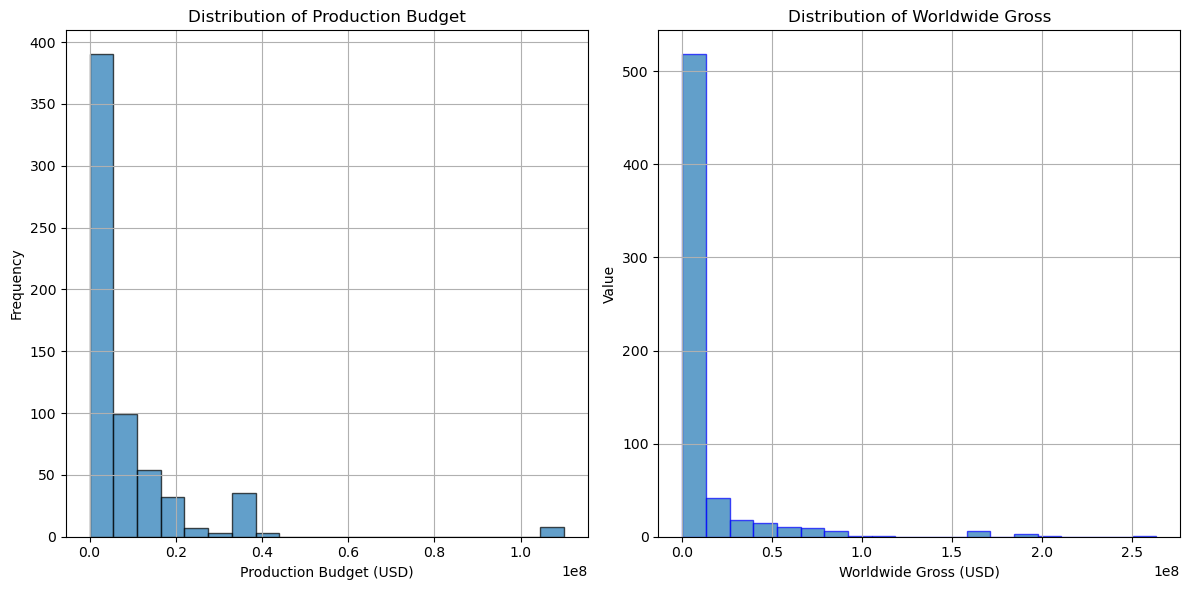

In [25]:


# Create subplots for better organization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Production Budget
ax1.hist(merged_data['production_budget'], bins=20, edgecolor='black', alpha=0.7)
ax1.set_title('Distribution of Production Budget')
ax1.set_xlabel('Production Budget (USD)')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# Boxplot for Worldwide Gross
ax2.hist(merged_data['worldwide_gross'], bins=20, edgecolor='blue', alpha=0.7)
ax2.set_title('Distribution of Worldwide Gross')
ax2.set_xlabel('Worldwide Gross (USD)')
ax2.set_ylabel('Value')
ax2.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Production Budget: The distribution of production budgets appears to be skewed to the right. This means that there are more movies with lower production budgets than there are movies with higher production budgets. There could be a few outliers on the right side of the plot, representing movies with very high production budgets.

Worldwide Gross: It's difficult to say definitively from this graph whether the worldwide gross is skewed or not. The distribution appears to be wider on the right side, which could indicate a positive skew, but it's also possible that the distribution is more symmetrical than it appears due to the way the data is binned.

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


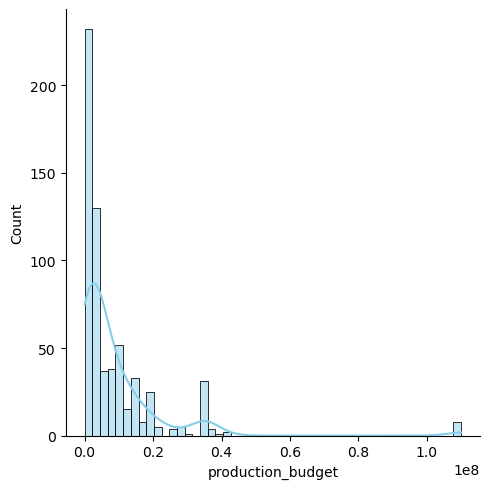

In [26]:


# Create a single figure with two subplots
sns.displot(merged_data['production_budget'], kde=True, color='skyblue')

plt.show();


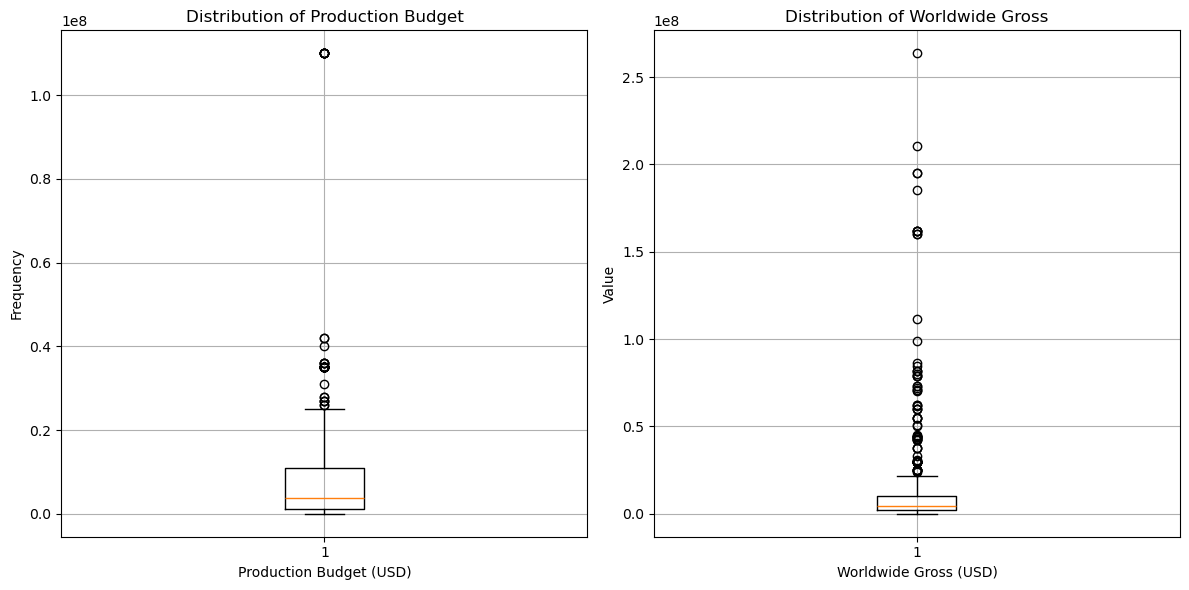

In [28]:
# Create subplots for better organization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Production Budget
ax1.boxplot(merged_data['production_budget'])
ax1.set_title('Distribution of Production Budget')
ax1.set_xlabel('Production Budget (USD)')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# Boxplot for Worldwide Gross
ax2.boxplot(merged_data['worldwide_gross'])
ax2.set_title('Distribution of Worldwide Gross')
ax2.set_xlabel('Worldwide Gross (USD)')
ax2.set_ylabel('Value')
ax2.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [29]:
Q1 = merged_data['worldwide_gross'].quantile(0.25)
Q3 = merged_data['worldwide_gross'].quantile(0.75)
IQR = Q3 - Q1



In [30]:
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)


In [ ]:
outliers = merged_data[(merged_data['worldwide_gross'] < lower_bound) | (merged_data['worldwide_gross'] > upper_bound)]
